<a href="https://colab.research.google.com/github/geforce25/google-colab-interoperability/blob/main/Dimmer_Switches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

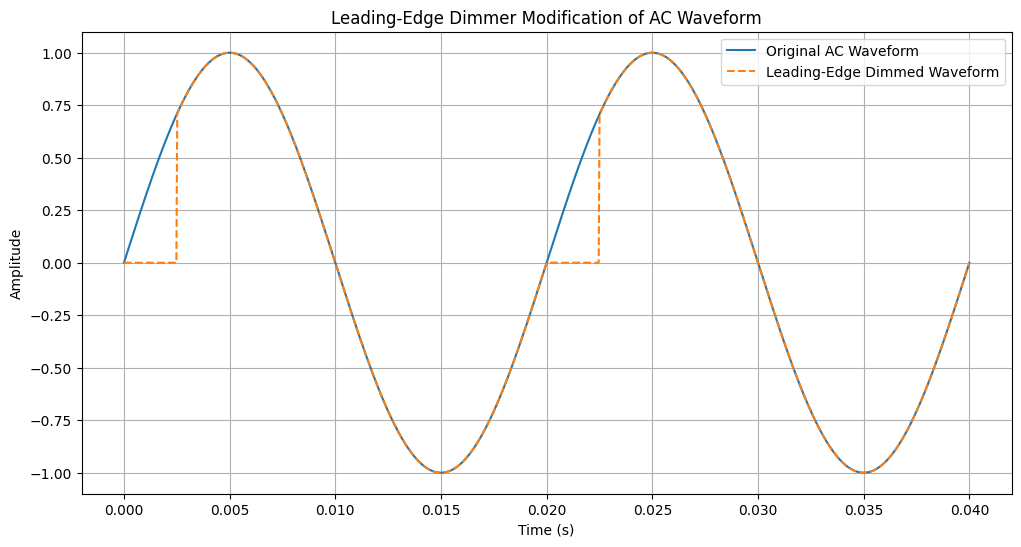

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
frequency = 50  # 50 Hz AC
time = np.linspace(0, 0.04, 1000)  # One period of the AC waveform (1/50 = 0.02s)

# Original AC waveform
original_waveform = np.sin(2 * np.pi * frequency * time)

# Leading-edge dimmer modification
cutoff_angle = np.pi / 4  # Cutoff at 45 degrees (π/4 radians)
modified_waveform = np.where(time % (1/frequency) < (cutoff_angle / (2 * np.pi * frequency)), 0, original_waveform)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time, original_waveform, label='Original AC Waveform')
plt.plot(time, modified_waveform, label='Leading-Edge Dimmed Waveform', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Leading-Edge Dimmer Modification of AC Waveform')
plt.legend()
plt.grid(True)
plt.show()

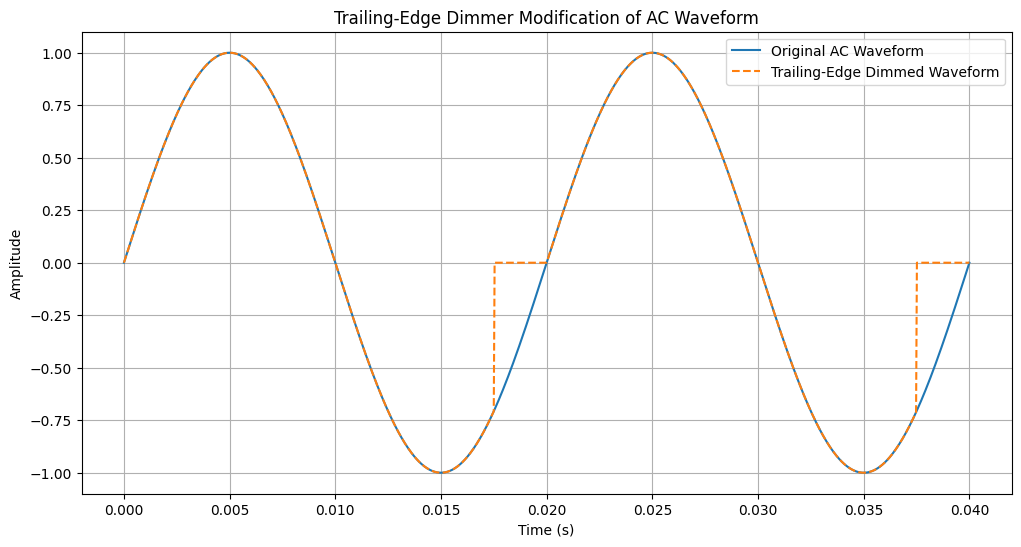

In [2]:
# Trailing-edge dimmer modification
modified_waveform_trailing = np.where(time % (1/frequency) > (1/frequency - cutoff_angle / (2 * np.pi * frequency)), 0, original_waveform)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time, original_waveform, label='Original AC Waveform')
plt.plot(time, modified_waveform_trailing, label='Trailing-Edge Dimmed Waveform', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Trailing-Edge Dimmer Modification of AC Waveform')
plt.legend()
plt.grid(True)
plt.show()

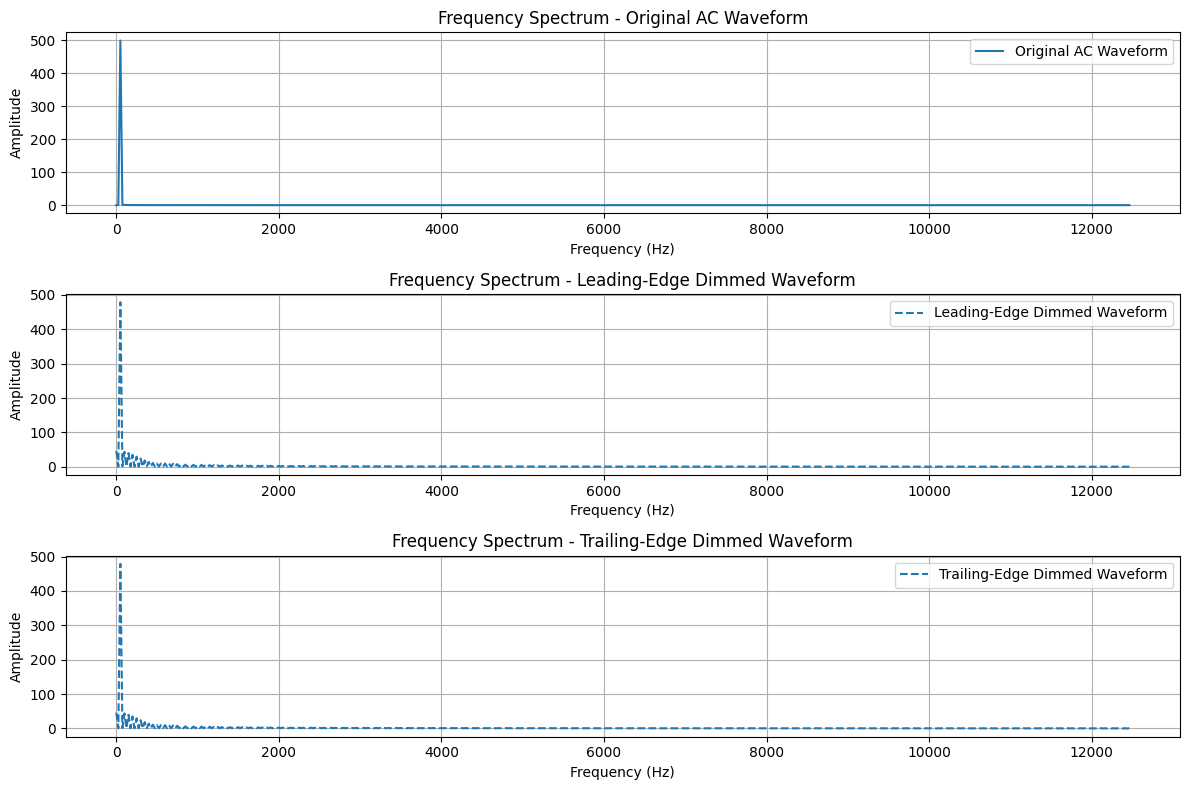

In [3]:
# plot the Fourier transform of the original and dimmed waveforms

from scipy.fft import fft, fftfreq

# Compute FFT for original waveform
original_fft = fft(original_waveform)
original_freq = fftfreq(len(time), time[1] - time[0])

# Compute FFT for leading-edge dimmed waveform
leading_fft = fft(modified_waveform)
leading_freq = fftfreq(len(time), time[1] - time[0])

# Compute FFT for trailing-edge dimmed waveform
trailing_fft = fft(modified_waveform_trailing)
trailing_freq = fftfreq(len(time), time[1] - time[0])

# Plotting the frequency spectrums
plt.figure(figsize=(12, 8))

# Original waveform spectrum
plt.subplot(3, 1, 1)
plt.plot(original_freq[:len(original_freq)//2], np.abs(original_fft[:len(original_fft)//2]), label='Original AC Waveform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum - Original AC Waveform')
plt.grid(True)
plt.legend()

# Leading-edge dimmed waveform spectrum
plt.subplot(3, 1, 2)
plt.plot(leading_freq[:len(leading_freq)//2], np.abs(leading_fft[:len(leading_fft)//2]), label='Leading-Edge Dimmed Waveform', linestyle='--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum - Leading-Edge Dimmed Waveform')
plt.grid(True)
plt.legend()

# Trailing-edge dimmed waveform spectrum
plt.subplot(3, 1, 3)
plt.plot(trailing_freq[:len(trailing_freq)//2], np.abs(trailing_fft[:len(trailing_fft)//2]), label='Trailing-Edge Dimmed Waveform', linestyle='--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum - Trailing-Edge Dimmed Waveform')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()